In [129]:
#we have a data set for 2 houses as given below
#house 1 - 1000 sqft - 3000000$
#house 2 - 2000 sqft - 5000000$

In [130]:
import numpy as np
import pandas as pd

f = pd.read_csv('weight-height.csv')

males = f[f['Gender']=='Male']
females = f[f['Gender']=='Female']

weights_male = np.array(males['Weight'], dtype = np.float64)
heights_male = np.array(males['Height'], dtype = np.float64)
weights_female = np.array(females['Weight'], dtype = np.float64)
heights_female = np.array(females['Height'], dtype = np.float64)

In [131]:
def compute_cost(area, price, w, b):
    total_cost = 0
    m = len(area)
    for i in range (0,m):
        total_cost += pow((w*area[i]+b - price[i]),2)
    total_cost = total_cost/(2*m)
    return total_cost

In [132]:
#computing gradient

def compute_gradient(area, price, w, b):
    dj_dw = 0
    dj_db = 0
    m = len(area)
    for i in range (0,m):
        dj_dw += (w*area[i]+b  - price[i])*area[i]
        dj_db += (w*area[i]+b  - price[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [133]:
#iterating to set w, b to optimal values for males
w_m = 6.5
b_m = -300
alpha_w = 0.0001
alpha_b = 0.0001
num_iterations  = 5000
cost_m = np.array([])

for i in range(num_iterations):
    dj_dw_m, dj_db_m = compute_gradient(heights_male, weights_male, w_m, b_m)
    w_m = w_m - alpha_w*dj_dw_m
    b_m = b_m - alpha_b*dj_db_m
    cost_m = np.append(cost_m, compute_cost(heights_male, weights_male, w_m, b_m))
    
print(f"w , b for males : ({w_m},{b_m})")
    
#iterating to set w, b to optimal values for females
w_f = 5
b_f = -270
alpha_w = 0.0001
alpha_b = 0.0001
cost_f = np.array([])

for i in range(num_iterations):
    dj_dw_f, dj_db_f = compute_gradient(heights_female, weights_female, w_f, b_f)
    w_f = w_f - alpha_w*dj_dw_f
    b_f = b_f - alpha_b*dj_db_f
    cost_f = np.append(cost_f, compute_cost(heights_female, weights_female, w_f, b_f))
    
print(f"w , b for females : ({w_f},{b_f})")

w , b for males : (7.052644927761038,-299.9272066221941)
w , b for females : (6.369208114579985,-269.9571362105462)


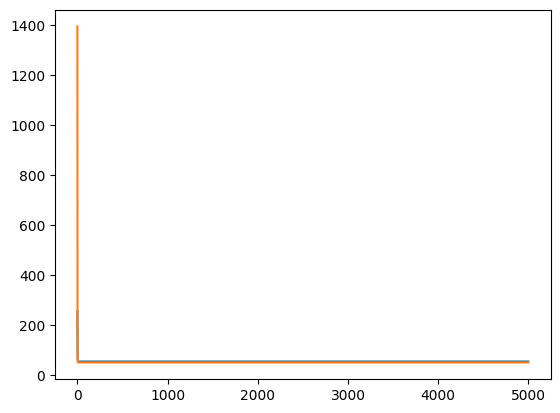

In [134]:
import matplotlib.pyplot as plt

plt.plot(range(num_iterations), cost_m, cost_f)
plt.show()

In [135]:
#making predicted weights array for males
weights_male_prediction = np.array([])

for h in heights_male:
    weights_male_prediction = np.append(weights_male_prediction, w_m*h+b_m)
    
#making predicted weights array for females
weights_female_prediction = np.array([])

for h in heights_female:
    weights_female_prediction = np.append(weights_female_prediction, w_f*h+b_f)

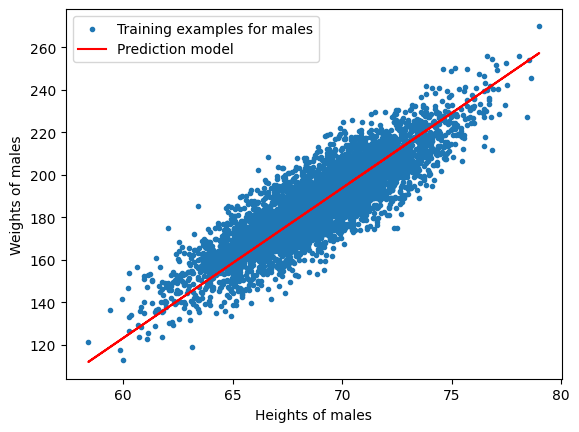

In [136]:
#plotting training points and fitted model for males

plt.scatter(heights_male, weights_male, label = 'Training examples for males', marker='.')
plt.plot(heights_male , weights_male_prediction, color = 'red', label = 'Prediction model')
plt.xlabel('Heights of males')
plt.ylabel('Weights of males')
plt.legend()
plt.show()

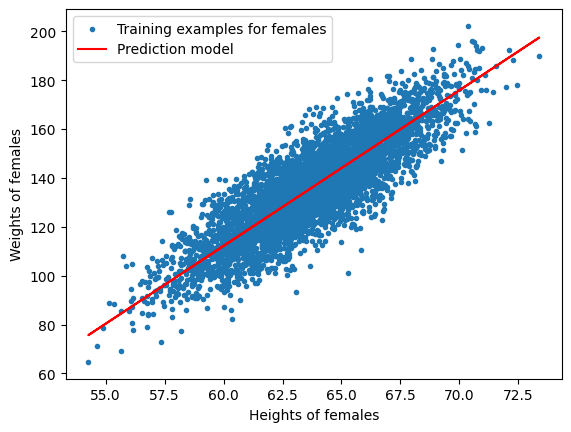

In [137]:
#plotting training points and fitted model for females

plt.scatter(heights_female, weights_female, label = 'Training examples for females', marker='.')
plt.plot(heights_female , weights_female_prediction, color = 'red', label = 'Prediction model')
plt.legend()
plt.xlabel('Heights of females')
plt.ylabel('Weights of females')
plt.show()